In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
column=['feedback']
df=pd.read_csv("Feedback.csv",names=column,header=None)
fa=df['feedback']
df['feedback']=df['feedback'].astype(str)
df.dropna(subset=['feedback'])
dict={'positive':0,'negative':0,'neutral':0}
positive=[]
negative=[]
neutral=[]

In [3]:
df.head()

,feedback
teaching,feedback
0,teacher are punctual but they should also give...
1,Good
1,Excellent lectures are delivered by teachers a...
1,Good


In [4]:
for i in fa:
    #remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(i)
    final=' '.join(tokens)
    
    #remove non english words
    a1=" ".join(w for w in nltk.wordpunct_tokenize(final)if w.lower() in words or not w.isalpha())
    
    #remove proper nouns
    tokenized = nltk.word_tokenize(a1)
    pos=nltk.tag.pos_tag(tokenized)
    ed=[word for word,tag in pos if tag!='NNP' and tag!='NNPs']#removing proper nouns
    end=' '.join(ed)
    
    #remove stop words
    en=[i for i in word_tokenize(end.lower()) if i not in stop] 
    final=' '.join(en)
    
    #using vader classfiers
    sid=SentimentIntensityAnalyzer()
    ss=sid.polarity_scores(final)
    if(ss['compound']==0):
        dict['neutral']+=1
        neutral.append(final)
    elif(ss['compound']>0):
        dict['positive']+=1
        positive.append(final)
    else:
        dict['negative']+=1
        negative.append(final)

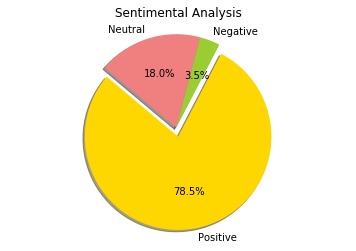

In [5]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [dict['positive'],dict['negative'],dict['neutral']]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Sentimental Analysis')
plt.show()

Mostly Negative happened in exam
Mostly Negative happened in exam
Mostly Negative happened in exam
Mostly Negative happened in exam
Mostly Negative happened in library
Mostly Negative happened in library
Mostly Negative happened in library
{'interaction': 1, 'accurate': 1, 'supplement': 1, 'material': 1, 'provided': 1, 'recommendation': 1, 'change': 1, 'particular': 1, 'teacher': 3, '3': 1, 'semester': 1, 'subject': 2, 'university': 2, 'management': 1, 'faculty': 2, 'un': 1, 'experienced': 1, 'also': 1, 'many': 1, 'experience': 1, 'understand': 3, 'marking': 4, 'thing': 2, 'sowing': 1, 'answer': 4, 'exam': 4, 'dont': 1, 'paper': 2, 'correction': 1, 'examination': 1, 'get': 1, 'even': 1, '4': 1, 'key': 1, 'absurd': 1, 'discrepancy': 1, 'system': 2, 'right': 1, 'main': 1, 'concept': 1, 'pattern': 1, 'time': 1, 'sufficient': 1, 'sometimes': 1, 'everything': 1, 'desk': 1, 'evaluation': 1, 'one': 1, 'really': 2, 'us': 4, 'basis': 2, 'present': 1, 'front': 1, 'never': 1, 'look': 1, 'content'

(-0.5, 399.5, 199.5, -0.5)

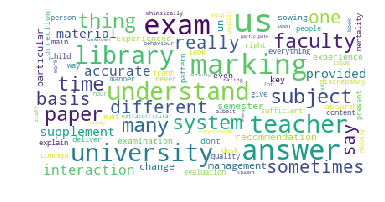

In [6]:
from collections import Counter

p=[]
for i in negative:
    a=i.split()
    for j in a:
        if((sid.polarity_scores(j))['compound']==0):
            p.append(j)
        if j == 'exam' or j == 'library' or j == 'class':
            print("Mostly Negative happened in",j)
            my_dict = {i:p.count(i) for i in p}
print(my_dict)
p1=" ".join(p)
wordcloud = WordCloud(background_color='white',
max_words=200,max_font_size=40,random_state=42).generate(p1)
fig=plt.imshow(wordcloud)
plt.axis('off')

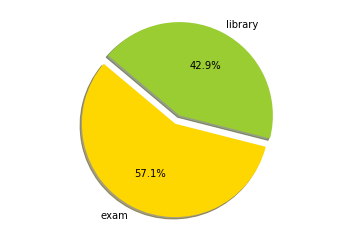

In [8]:
labels = 'exam', 'library'
sizes = [my_dict['exam'],my_dict['library']]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
Mostly Positive happened in exam
{'good': 550, 'excellent': 56, 'improve': 6, 'yes': 7, 'easy': 3, 'fine': 17, 'perfect': 7, 'clear': 3, 'kind': 1, 'entertaining': 1, 'well': 23, 'want': 2, 'giving': 5, 'easily': 4, 'nice': 11, 'effective': 1, 'satisfactory': 10, 'best': 9, 'encourage': 1, 'satisfied': 9, 'helpful': 11, 'like': 17, 'great': 4, 'top': 1, 'fair': 4, 'love': 2, 'pretty': 7, 'gain': 1, 'better': 7, 'fresh': 1, 'thanks': 1, 'number': 6, 'satisfying': 2, 'friendly': 1, 'effectively': 1, 'perfectly': 1, 'improvement': 4, '

(-0.5, 399.5, 199.5, -0.5)

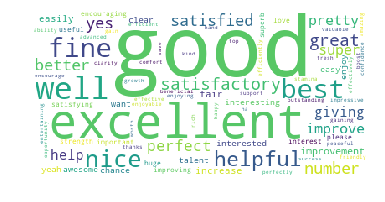

In [9]:
p=[]
for i in positive:
    a=i.split()
    #print(a)
    for j in a:
        if((sid.polarity_scores(j))['compound']>0):
            p.append(j)
        if j == 'exam' or my_dict == 'library' or my_dict == 'class':
            print("Mostly Positive happened in",j)
            my_dictp = {i:p.count(i) for i in p}
print(my_dictp)
p1=" ".join(p)
wordcloud = WordCloud(background_color='white',
max_words=200,max_font_size=100,random_state=42).generate(p1)
fig=plt.imshow(wordcloud)
plt.axis('off')

Mostly Neutral happened in class
Mostly Neutral happened in exam
Mostly Neutral happened in exam
Mostly Neutral happened in exam
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in library
Mostly Neutral happened in exam
{'feedback': 1, 'teacher': 1, 'punctual': 3, 'also': 4, 'give': 3, 'us': 2, 'practical': 7, 'knowledge': 7, 'really': 1, 'gud': 4, 'accurate': 4, 'average': 26, 'way': 2, 'teaching': 1, 'staff': 3, 'faculty': 2, 'always': 2, 'available': 7, 'interaction': 1, 'delivery': 1, 'lecture': 1, 'normal': 1, 'showing': 3, 'partiality': 2, 'north': 2, 'south': 2, 'student': 4, '7': 1, '90': 1, 'content': 15, 'course': 16, 'knowledgeable': 5, 'sometimes': 2, 'proper': 7, 'material': 5, 'update': 1, 'mostly': 1, 'based': 2, 'current': 1, 'technology': 1, 'appreciab

(-0.5, 399.5, 199.5, -0.5)

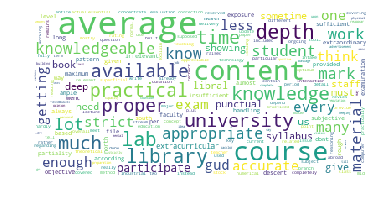

In [10]:
p=[]
for i in neutral:
    a=i.split()
    #print(a)
    for j in a:
        if((sid.polarity_scores(j))['compound']==0):
            p.append(j)
        if j == 'exam' or j == 'library' or j == 'class':
            print("Mostly Neutral happened in",j)
            my_dict = {i:p.count(i) for i in p}
print(my_dict)
            
p1=" ".join(p)
wordcloud = WordCloud(background_color='white',
max_words=200,max_font_size=40,random_state=42).generate(p1)
fig=plt.imshow(wordcloud)
plt.axis('off')

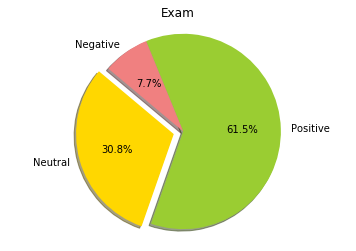

In [11]:
labels = 'Neutral', 'Positive', 'Negative'
sizes = [my_dict['exam'],my_dict['library'],my_dict['class']]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Exam')
plt.show()

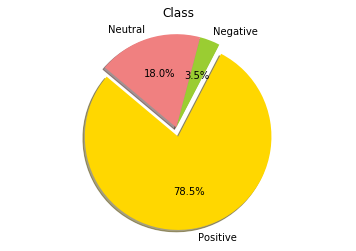

In [12]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [dict['positive'],dict['negative'],dict['neutral']]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class')
plt.axis('equal')
plt.show()

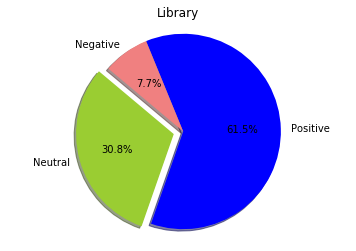

In [13]:
labels = 'Neutral', 'Positive', 'Negative'
sizes = [my_dict['exam'],my_dict['library'],my_dict['class']]
colors = ['yellowgreen', 'blue', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Library')
plt.show()